In [71]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

In [ ]:
cd /scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week5/Inputs

## MD simulation at 300 K

In [3]:
#compute phi and psi angles
traj = md.load_trr('adp.trr', top='adp.gro')
phi_angles = md.compute_phi(traj, periodic=True, opt=True)
psi_angles = md.compute_psi(traj, periodic=True, opt=True)

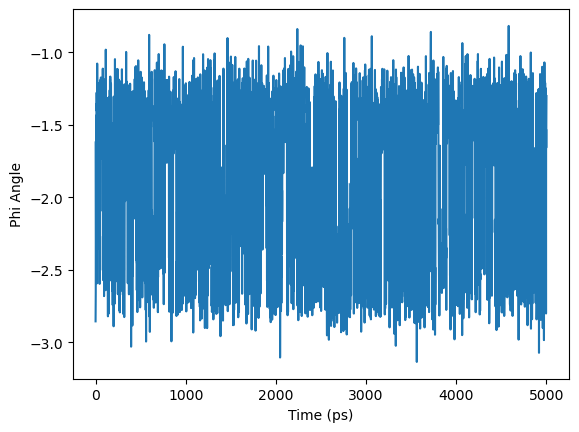

In [4]:
plt.plot(traj.time, phi_angles[1])

plt.xlabel('Time (ps)')
plt.ylabel('Phi Angle')

plt.show()

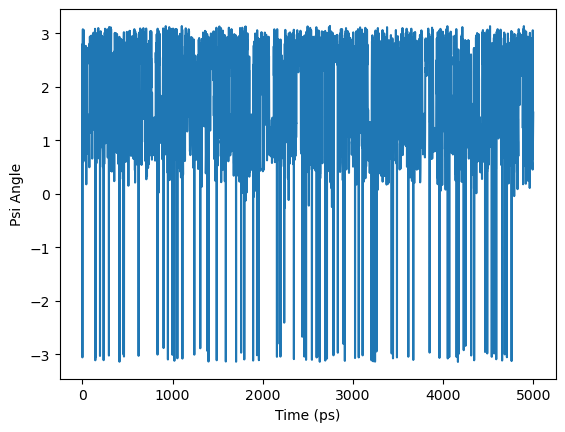

In [4]:
plt.plot(traj.time, psi_angles[1])
plt.xlabel('Time (ps)')
plt.ylabel('Psi Angle')
plt.show()

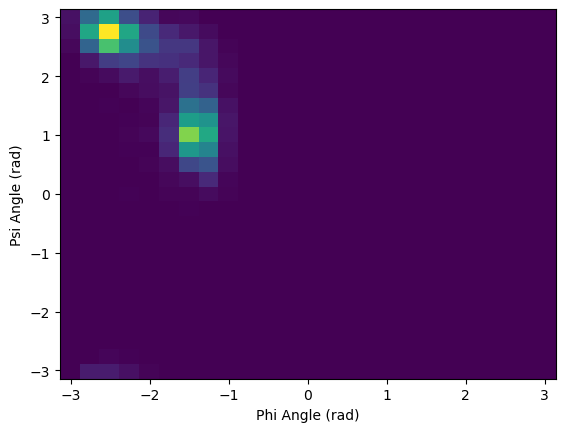

In [5]:
# plot histograms 
x = phi_angles[1].flatten()
y = psi_angles[1].flatten()
plt.hist2d(x, y, range=[[-np.pi, np.pi], [-np.pi, np.pi]], bins=25)
plt.xlabel('Phi Angle (rad)')
plt.ylabel('Psi Angle (rad)')
plt.show()

In [6]:
#save histogram data as array

hist_data, xedges, yedges = np.histogram2d(x, y, bins=25, range=[[-np.pi, np.pi], [-np.pi, np.pi]], normed=None, weights=None, density=None)
hist_data= hist_data.T

/state/partition1/job-25880418/ipykernel_2245554/1905274169.py:3: RuntimeWarning: divide by zero encountered in log
  energy_data = -np.log(hist_data)


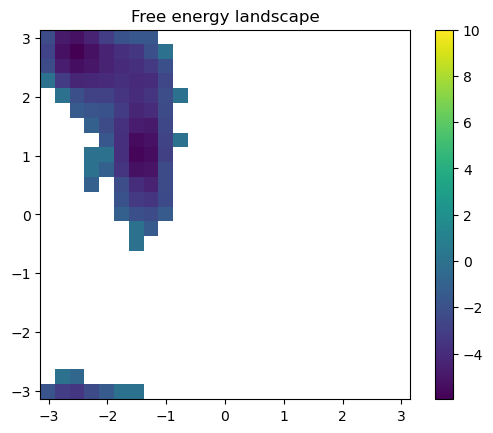

In [75]:
#free energy plots

energy_data = -np.log(hist_data)

plt.imshow(energy_data, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower')
plt.title('Free energy landscape')
plt.colorbar(mappable=None, cax=None, ax=None)
plt.clim(vmax=10)
plt.show()

## Parallel tempering

In [84]:
cd /scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week5/T300_new

/scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week5/T300_new


/state/partition1/job-25880418/ipykernel_2245554/929913915.py:13: RuntimeWarning: divide by zero encountered in log
  energy_data = -np.log(hist_data)


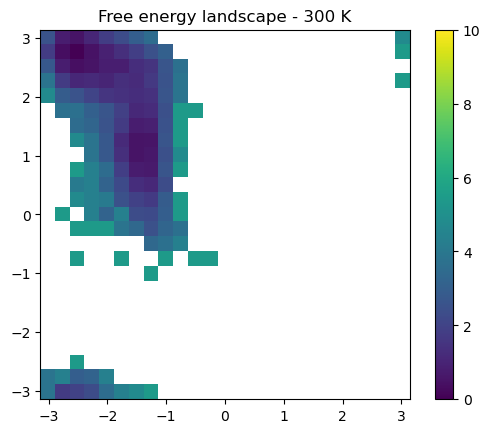

In [99]:
#free energy surface

traj = md.load_trr('adp_exchange4temps.trr', top='adp.gro')
phi_angles = md.compute_phi(traj, periodic=True, opt=True)
psi_angles = md.compute_psi(traj, periodic=True, opt=True)

x = phi_angles[1].flatten()
y = psi_angles[1].flatten()

hist_data, xedges, yedges = np.histogram2d(x, y, bins=25, range=[[-np.pi, np.pi], [-np.pi, np.pi]], normed=None, weights=None, density=None)
hist_data= hist_data.T

energy_data = -np.log(hist_data)

energy_data = energy_data - np.min(energy_data)

plt.imshow(energy_data, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower')
plt.title('Free energy landscape - 300 K')

plt.colorbar(mappable=None, cax=None, ax=None)
plt.clim(vmax=10)

plt.show()

note: the free energy landscape is very similar to before the parallel tempering, even though there was a good rate of exchange with higher temp reservoirs (57-68% according to the log files). this occurred with the original temperatures specified in the assignment but also occurs using reservoirs at 300/360/420/480 where temperatures are more spaced out and Tmax is higher

below i also try plotting the free energies for the highest temperature, 480 K, and it appears similar to at 300 K. not sure where i went wrong

In [100]:
cd /scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week5/T480

/scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week5/T480


/state/partition1/job-25880418/ipykernel_2245554/342137596.py:13: RuntimeWarning: divide by zero encountered in log
  energy_data = -np.log(hist_data)


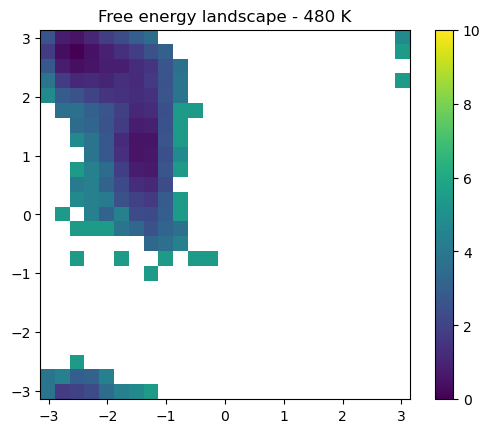

In [101]:
#free energy surface for Tmax

traj = md.load_trr('adp_exchange4temps.trr', top='adp.gro')
phi_angles = md.compute_phi(traj, periodic=True, opt=True)
psi_angles = md.compute_psi(traj, periodic=True, opt=True)

x = phi_angles[1].flatten()
y = psi_angles[1].flatten()

hist_data, xedges, yedges = np.histogram2d(x, y, bins=25, range=[[-np.pi, np.pi], [-np.pi, np.pi]], normed=None, weights=None, density=None)
hist_data= hist_data.T

energy_data = -np.log(hist_data)

energy_data = energy_data - np.min(energy_data)

plt.imshow(energy_data, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower')
plt.title('Free energy landscape - 480 K')

plt.colorbar(mappable=None, cax=None, ax=None)
plt.clim(vmax=10)

plt.show()

In [ ]:
#potential energy histograms 

cd /scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week5/T300_new

In [85]:
f = open('energy.xvg')

lines=f.readlines()

#for num, line in enumerate(lines):
    #print(num, line)
    
data300 = lines[24:]

data300 = np.loadtxt(data300,unpack=True)

In [86]:
cd /scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week5/T360

/scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week5/T360


In [88]:
f = open('energy.xvg')

lines=f.readlines()

#for num, line in enumerate(lines):
    #print(num, line)
    
data360 = lines[24:]

data360 = np.loadtxt(data360,unpack=True)

In [89]:
cd /scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week5/T420

/scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week5/T420


In [90]:
f = open('energy.xvg')

lines=f.readlines()

#for num, line in enumerate(lines):
    #print(num, line)
    
data420 = lines[24:]

data420 = np.loadtxt(data420,unpack=True)

In [91]:
cd /scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week5/T480

/scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week5/T480


In [92]:
f = open('energy.xvg')

lines=f.readlines()

#for num, line in enumerate(lines):
    #print(num, line)
    
data480 = lines[24:]

data480 = np.loadtxt(data480,unpack=True)

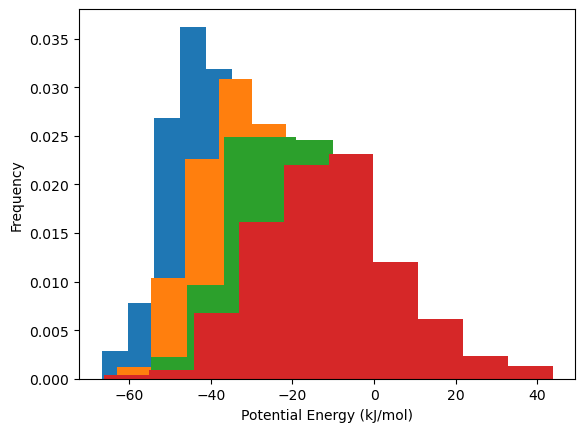

In [93]:
plt.hist(data300[1], bins=10, density=True)
plt.hist(data360[1], bins=10, density=True)
plt.hist(data420[1], bins=10, density=True)
plt.hist(data480[1], bins=10, density=True)
plt.xlabel('Potential Energy (kJ/mol)')
plt.ylabel('Frequency')
plt.show()

In [94]:
cd /scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week5/T300_new

/scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week5/T300_new


In [95]:
#temperature replica plots

f = np.loadtxt('replica_index.xvg')

times = []
col1 = []
col2 = []
col3 = []
col4 = []

for i in range(len(f)):
    if i%1000==0: #every 1000 frames for clarity
        times.append(f[i][0])
        col1.append(f[i][1])
        col2.append(f[i][2])
        col3.append(f[i][3])
        col4.append(f[i][4])

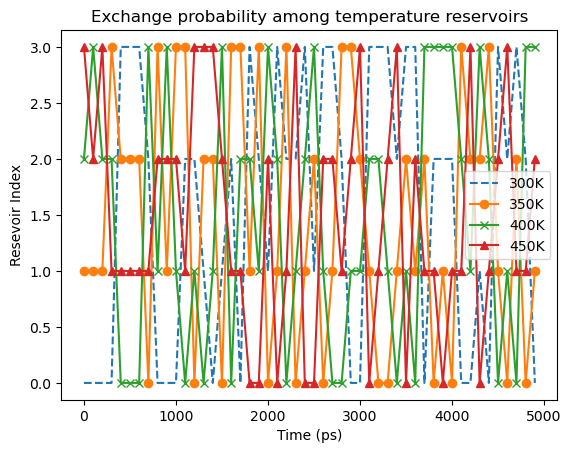

In [96]:
plt.plot(times, col1, '--', label='300K')
plt.plot(times, col2,'o-', label='350K')
plt.plot(times, col3, 'x-', label='400K')
plt.plot(times, col4, '^-', label='450K')
plt.xlabel("Time (ps)")
plt.ylabel("Resevoir Index")
plt.legend()
plt.title('Exchange probability among temperature reservoirs')
plt.show()